Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Data sets/Pizza Price Prediction/pizza_v2.csv')
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [3]:
df['price_rupiah']=df['price_rupiah'].str.replace('Rp','').str.replace(',','')

In [4]:
df['diameter']=df['diameter'].str.replace('inch',"").str.rstrip()

In [5]:
#df.astype({'price_rupiah':int,'diameter':int})

In [6]:
#changing data type

df['diameter']=pd.to_numeric(df['diameter'])
df['price_rupiah']=pd.to_numeric(df['price_rupiah'])

In [7]:
df.select_dtypes(include='object').nunique()

company             5
topping            12
variant            20
size                6
extra_sauce         2
extra_cheese        2
extra_mushrooms     2
dtype: int64

In [8]:
df.select_dtypes(include=int).nunique()


price_rupiah    43
dtype: int64

In [9]:
df.select_dtypes(include=float).nunique()

diameter    11
dtype: int64

In [10]:
df['variant'].unique()

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

In [11]:
from pandas.core.indexers.objects import VariableOffsetWindowIndexer
# define function to segment pizza names into types
def segment_pizza(variant_a):
  if 'veggie' in variant_a:
    return 'Veg'
  elif 'BBQ' in variant_a or 'meat' in variant_a:
    return 'Non-veg'
  elif 'tuna' in variant_a:
    return 'Seafood'
  else:
    return 'Other'

df['Pizza_Seg']=df['variant'].apply(segment_pizza)

In [12]:
df.loc[df['topping']=='chicken','Pizza_Seg']='Non-veg'

In [13]:
df.loc[df['topping'] == 'meat','Pizza_Seg']='Non-veg'

In [14]:
#df.loc[(df['topping'] == 'meat') | (df['topping'] == 'chicken')]


In [15]:
df.loc[df['topping'].str.contains('beef')|df['topping'].str.contains('papperoni'),'Pizza_Seg'] = 'Non-veg'

Text(0.5, 1.0, 'Distribution of pizza segment')

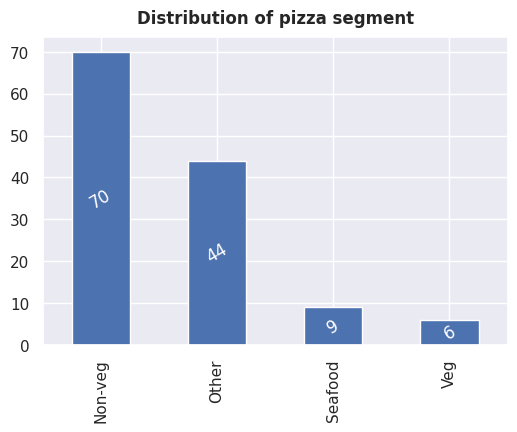

In [16]:
plt.figure(figsize=(6,4))
ax=df['Pizza_Seg'].value_counts().plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container,color='white',weight='normal',rotation=30,label_type='center')
plt.title('Distribution of pizza segment',pad=10,weight='bold')


In [17]:

cat_vars=list(df.select_dtypes(include='object').nunique().index)

In [18]:
cat_vars.remove('variant')
cat_vars.remove('Pizza_Seg')


In [19]:
# list of categorical variables to plot
cat_vars

['company',
 'topping',
 'size',
 'extra_sauce',
 'extra_cheese',
 'extra_mushrooms']

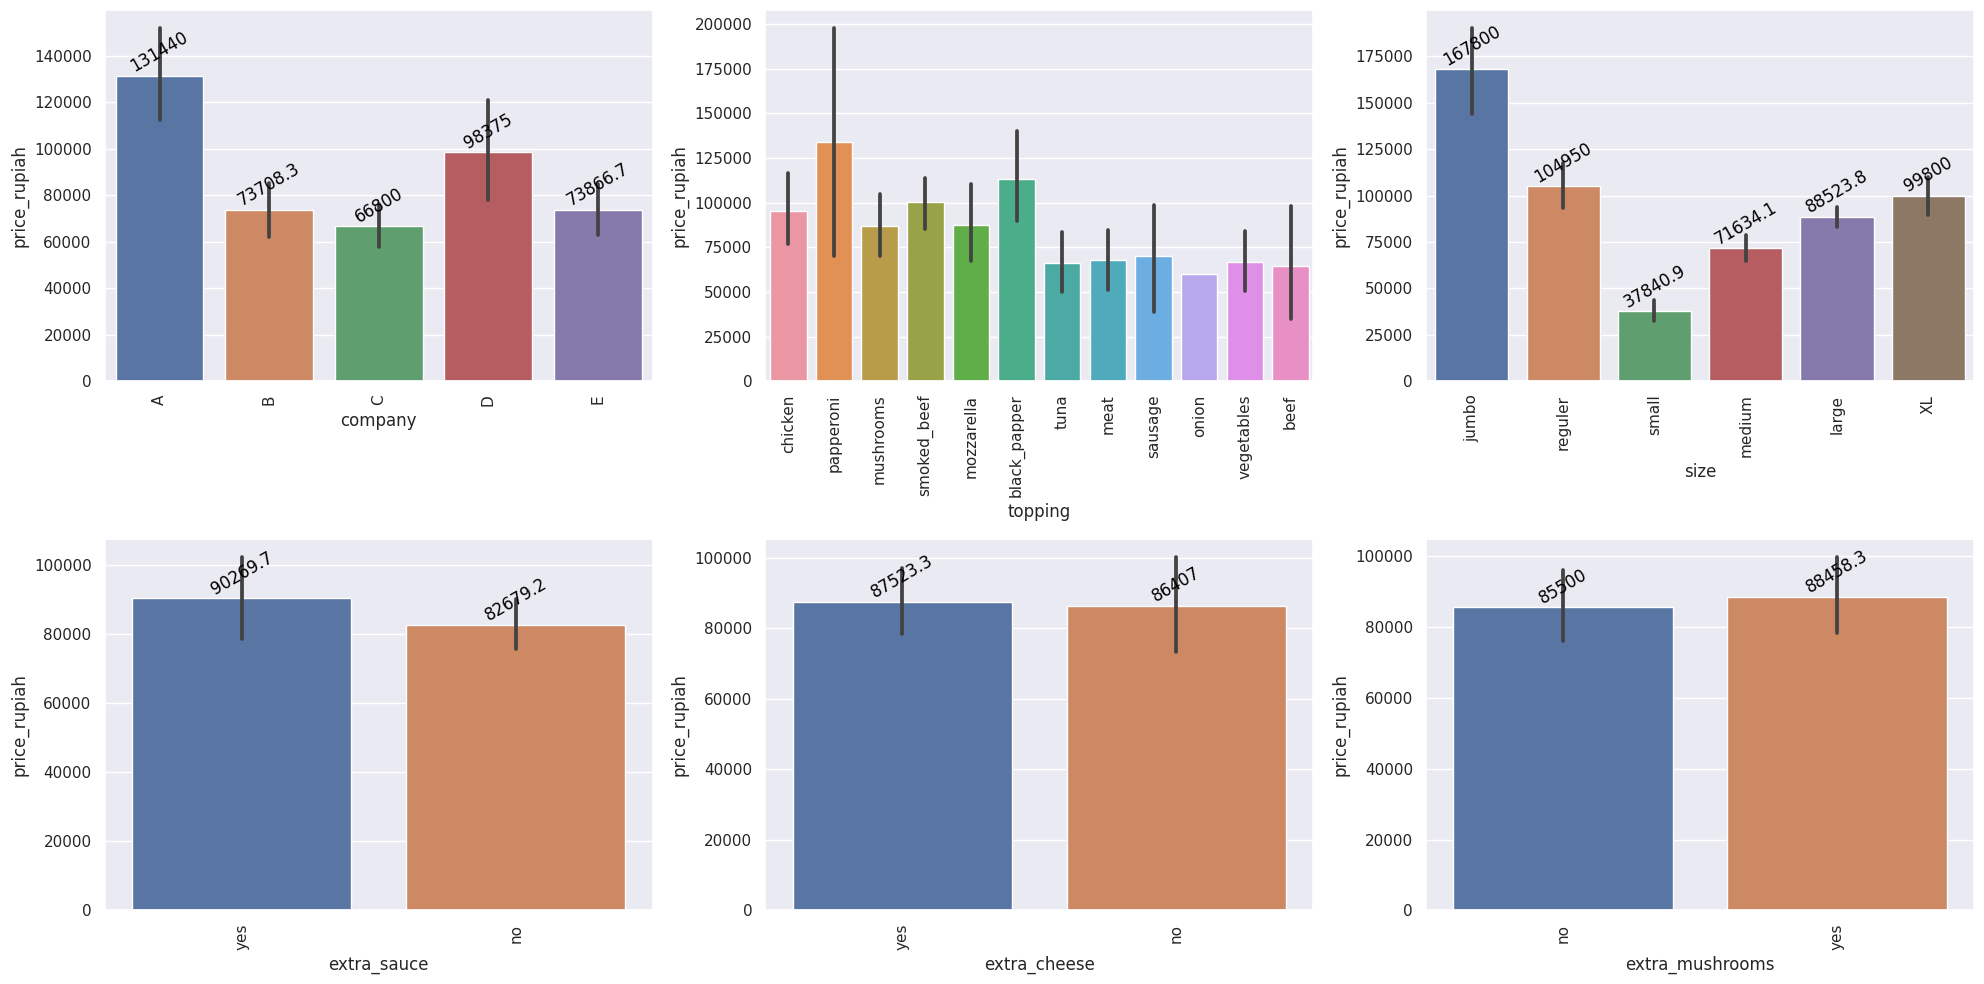

In [20]:
from ast import If
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs=axs.ravel()
# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    ax=sns.barplot(x=var, y='price_rupiah', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    if i!=1:
      for container in ax.containers:
        container.datavalues
        ax.bar_label(container,color='black',weight='normal',rotation=30,label_type='edge')
    
# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

<Axes: xlabel='diameter'>

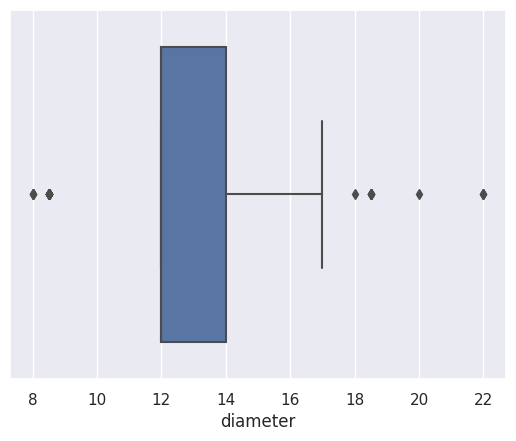

In [21]:
sns.boxplot(data=df,x='diameter')


<Axes: xlabel='diameter'>

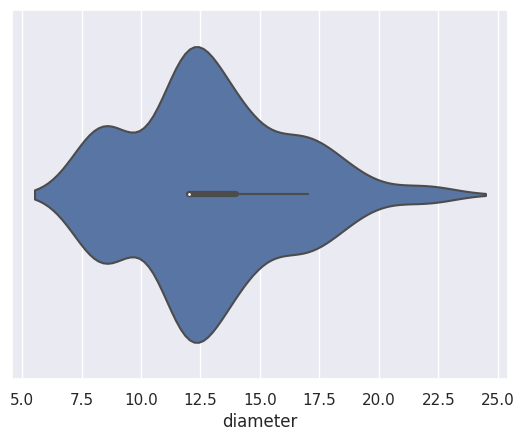

In [22]:
sns.violinplot(data=df,x='diameter')

<Axes: xlabel='diameter', ylabel='price_rupiah'>

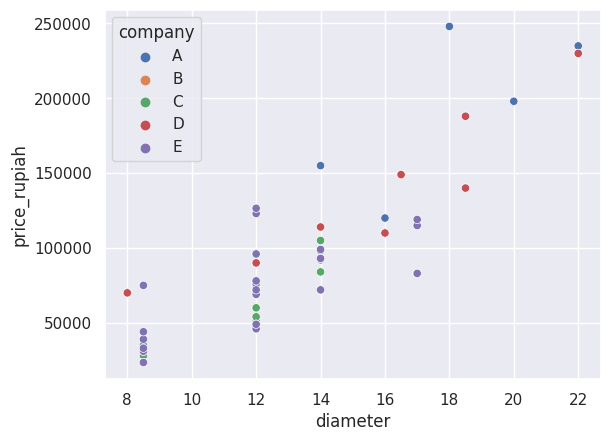

In [23]:
sns.scatterplot(data=df,x='diameter',y='price_rupiah',hue='company')

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_rupiah,129.0,87151.162791,44706.097732,23500.0,51000.0,78000.0,105000.0,248000.0
diameter,129.0,12.976744,3.272674,8.0,12.0,12.0,14.0,22.0


In [25]:
df.corr()

<ipython-input-25-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price_rupiah,diameter
price_rupiah,1.000000,0.826977
diameter,0.826977,1.000000


In [26]:
bins=np.arange(0,df['price_rupiah'].max()+50000,50000)

In [27]:
slot=['0-50000','50000-100000','100000-150000','150000-200000','200000 And above']

In [28]:
df['price_rupiah_range']=pd.cut(df['price_rupiah'],bins,labels=slot)
#bins

Text(0.5, 1.0, 'Distribution of price_rupiaa_range')

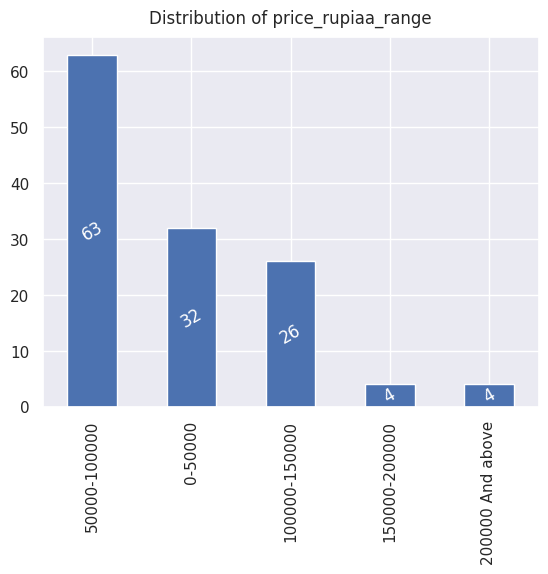

In [29]:
ax1=df['price_rupiah_range'].value_counts().plot(kind='bar')
for container1 in ax1.containers:
  ax1.bar_label(container1,color='white',label_type='center',rotation=30)
plt.title("Distribution of price_rupiaa_range",pad=10)
